In [116]:
#importar librerias para limpieza de data
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#omitir warnings
import warnings
warnings.filterwarnings("ignore")

link datasource https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/

In [117]:
#Generar la ruta a el archivo CSV
FILE_NAME = "heart.csv"
PATH_TO_DATA_SET = "Data_set"

cdw = os.getcwd()
file_path = os.path.join(cdw, PATH_TO_DATA_SET, FILE_NAME)


In [118]:
#importar CSV y mostrar los 5 primeros registros
df = pd.read_csv(file_path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [119]:
#verificar la información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [120]:
#comprobar los valores nulls
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [121]:
#verificar registros duplicados
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [122]:
#Eliminamos los duplicados y comprobamos
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [123]:
#calcula valores descriptivos para todas las columnas excepto la salida, transpone filas y columnas, ademas ordena por la desviación estándar
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)

,count,mean,std,min,25%,50%,75%,max
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
caa,302.0,0.718543,1.006748,0.0,0.00,0.0,1.00,4.0
slp,302.0,1.397351,0.616274,0.0,1.00,1.0,2.00,2.0
thall,302.0,2.314570,0.613026,0.0,2.00,2.0,3.00,3.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0


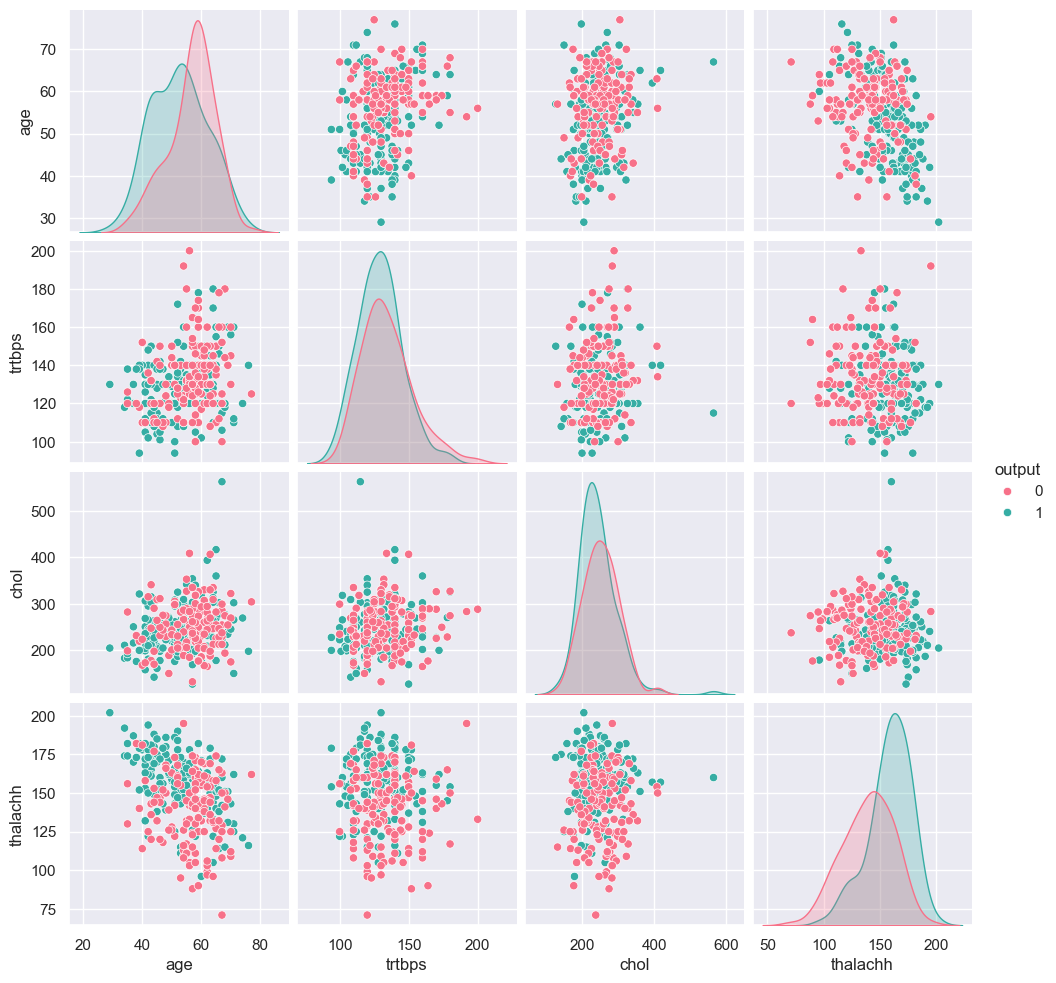

In [124]:
#matriz de gafricos
sns.pairplot(df[['age', 'trtbps', 'chol', 'thalachh', 'output']], hue='output', palette='husl')
plt.show()

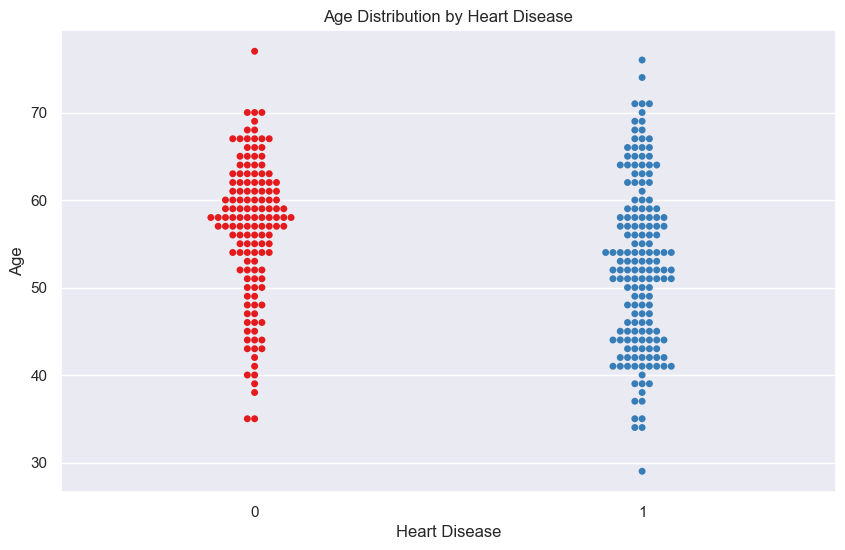

In [125]:
#distribucion de  problemas cardiacos vs edad
plt.figure(figsize=(10, 6))
sns.swarmplot(x='output', y='age', data=df, palette='Set1')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease')
plt.show()

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [132]:
# Dividimos los datos en variables independientes X, y variable dependiente y (especies)
X = df.drop(columns=['output'])
y = df['output']

# Dividimos datos para entrenamiento y prueba en 25% y 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [137]:
# Especificamos nuestro modelo de LogisticRegression con el numero maximo de iteraciones y lo entrenamos
logisticRegr = LogisticRegression(max_iter = 1000) 
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

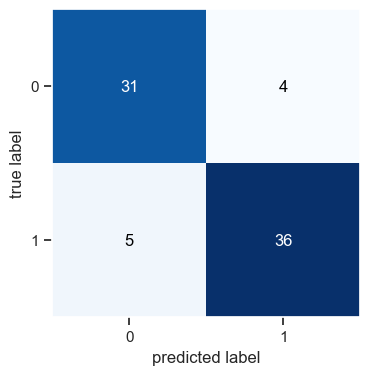

In [140]:
# Predicción del modelo

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = logisticRegr.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.show()

In [188]:
# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.881578947368421
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [190]:
# Importa el clasificador de Árbol de Decisión 
from sklearn.tree import DecisionTreeClassifier

# Crea una instancia del modelo de Árbol de Decisión con una profundidad máxima de 30
Tree_model = DecisionTreeClassifier(max_depth=30)

# Entrena el modelo utilizando los datos de entrenamiento
Tree_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de datos de prueba
y_pred_T = Tree_model.predict(X_test)


# Calcula y muestra la precisión del modelo en el conjunto de datos de prueba
print("Model Evaluation Decision Tree : accuracy score ", accuracy_score(y_test, y_pred_T))


Model Evaluation Decision Tree : accuracy score  0.8026315789473685


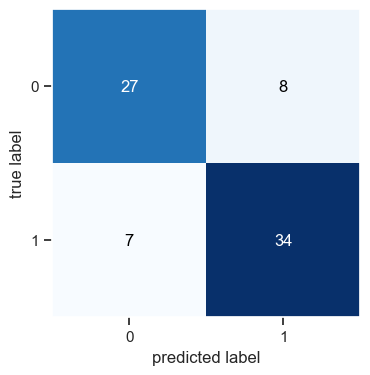

In [192]:
matriz = confusion_matrix(y_test,y_pred_T)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.show()